**Agenda**

- Loading Libraries
- Loading Data
- Getting Basic Idea About Data
- Missing Values and Dealing with Missing Values
- One Hot Encoding (Creating dummies for categorical columns)
- Standardization / Normalization
- Splitting the dataset into train and test data
- Dealing with Imbalanced Data
- Resampling Techniques - Oversample Minority Class
- Resampling Techniques - Undersample Majority Class
- Generate Synthetic Samples

In [1]:
import pandas as pd # A fundamental package for linear algebra and multidimensional arrays
import numpy as np # Data analysis and data manipulating tool
import random # Library to generate random numbers
from collections import Counter # Collection is a Python module that implements specialized container datatypes providing
# alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
# Counter is a dict subclass for counting hashable objects
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [3]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fraud_data.info() # Returns a concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


There are 434 columns with 59054 observations.

In [5]:
# Taking a look at the target variable
fraud_data.isFraud.value_counts() # The value_counts() function is used to get a Series containing counts of unique values.

0    57049
1     2005
Name: isFraud, dtype: int64

of 57049 observations / records only 2005 were fraud transactions.

In [6]:
fraud_data.isFraud.value_counts() / len(fraud_data) * 100 # Gets the percentage of unique values in the variable 'isFraud'

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

<AxesSubplot: xlabel='isFraud', ylabel='count'>

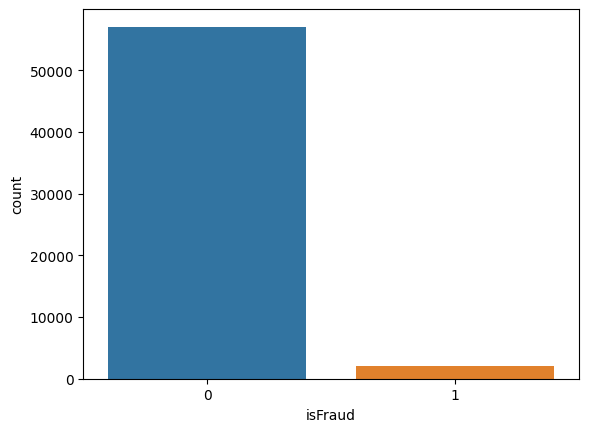

In [7]:
# we can also use countplot form seaborn to plot the above information graphically.
sns.countplot(x='isFraud', data=fraud_data)

There are only 3% of the data which are fraud and the rest 97% are not fraud. This is clearly a class imbalance problem.

#### Missing values
Generally datasets always have some missing values. May be done during data collection, or due to some data validation rule.

In [8]:
fraud_data.isnull().sum() / len(fraud_data) * 100 # To get percentage of missing data in each column

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [9]:
a = fraud_data.isnull().sum() > 0 # To get the Boolean results for the column with missing data

In [10]:
a.value_counts() # get the count of column with missing values

True     414
False     20
dtype: int64

Out of 434 columns, 414 have some missing values.

#### Dealing with Missing Values


Default value: One can fill the missing value by default value on the basis of one's 1) understanding of variable, 2) context / data insight or 3) common sense / logic.

Deleting: Suppose in our dataset we have too many missing values in Column, we can drop the column
Row, drop the row. Usually we do this for a large enough dataset.

Mean/Median/Mode - Imputation: We fill missing values by mean or median or mode(i.e. maximum occuring value). Generally we use mean but if there are some outliers, we fill missing values with median. Mode is used to fill missing values for categorical column.

Data Cleaning in Python: the Ultimate Guide

Eliminate columns with more than 20% missing values. Again this is very subjective and solely depends on the nature of the dataset and underlying context. We cannot generalize this procedure to all the datasets.

In [11]:
fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]] # Will keep those columns which has missing values less than 20%

Here we will fill missing values of numerical variables (or columns) with mean value.

Variables are nothing but the column names. From here on we will start using the variables instead of column or column names.

In [12]:
# filling missing values of numerical columns with mean value.
num_cols = fraud_data.select_dtypes(include=np.number).columns # getting all the numerical columns

fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean()) # fills the missing values with mean

Filling missing values of categorical variables with mode. For those unattended, Mode is maximum occuring element in a variable.

Why mode for categorical variables? - Let's take an example of categorical variable: "Social Status" with values: (Poor, Mid-income level, Rich). Can we find mean for social satus? No! So it may not be meaningful to go with mean in this case as it is not valid.

In [13]:
cat_cols = fraud_data.select_dtypes(include = 'object').columns # getting all the categorical columns

fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) # fills the missing values with maximum occuring element in the column

In [14]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 182, dtype: float64

Notice, now we don't have any column with missing value.

#### One Hot Encoding (Creating dummies for categorical columns)

In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. In Python there is a class 'OneHotEncoder' in 'sklearn.preprocessing' to do this task, but here we will use pandas function 'get_dummies()'. This get_dummies() does the same work as done by 'OneHotEncoder' form sklearn.preprocessing.

In [15]:
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols) # earlier we have collected all the categorical columns in cat_cols

In [16]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


If you notice, a lot of dummy variables are created like; P_emaildomain_hotmail.com, P_emaildomain_hotmail.de, etc.

#### Separate Input Features and Output Features

In [17]:
# Separate input features and output feature
X = fraud_data.drop(columns = ['isFraud']) # input features
Y = fraud_data.isFraud # output feature

#### Standardization / Normalization

Often variables in a real dataset come with a wide range of data values.

For example if you look at this fraud dataset, the variable 'TransactionAmt' has values in range 0.292 to 5279.95, while if you look at variable 'V14', it has values in the range 0.0 to 1.0. Basically, they are not on a common scale.

Performing standardization/normalization would bring all the variables in a dataset to a common scale so that it could further help in implementing various machine learning models (where standardization/normalization is a pre-requisite to apply such models). 



In [18]:
from sklearn.preprocessing import StandardScaler 
scaled_features = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
scaled_features = pd.DataFrame(data=scaled_features) 
scaled_features.columns= X.columns # Assigning the column names to the scaled_features dataframe

In [19]:
# Let's see how the data looks after scaling
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-0.082944,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253


#### Splitting the dataset into train and test data

In [20]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.

# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

#### Dealing with Imbalanced Data

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. 

Resampling Techniques - **Oversample Minority Class**: Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.

BEFORE you try any oversampling techniques you must split your data into train and test datasets

Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [21]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

In [22]:
# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

In [23]:
# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [24]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                  replace = True, # Sample with replacement
                  n_samples = len(not_fraud), # Match number in majority class
                  random_state=27)

This code is doing upsampling of a dataset in which the "fraud" class is the minority class. The resample() function is being used to randomly select samples from the fraud class with replacement, until the number of samples in the fraud class matches the number of samples in the majority class (in this case, "not_fraud"). The replace = True argument tells the resample() function to sample with replacement, and the n_samples = len(not_fraud) argument tells it to sample until the number of samples in the fraud class matches the number of samples in the not_fraud class. The random_state=27 is used to ensure reproducibility of the resampling process.





In [25]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [26]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

0    39942
1    39942
Name: isFraud, dtype: int64

 after resampling we have an equal ratio of data points for each class

Resampling Techniques - **Undersample Majority Class**: Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [27]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
replace = False, # sample without replacement
n_samples = len(fraud), # match minority n
random_state = 27)

In [28]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud]) # Concatenation

In [29]:
# let's check the classes counts
downsampled.isFraud.value_counts()

0    1395
1    1395
Name: isFraud, dtype: int64

an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on.

Generate Synthetic Samples: Here we will use imblearn’s SMOTE or **Synthetic Minority Oversampling Technique**. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [32]:
# import SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1,random_state=25)# again we are eqalizing both the classes

In [35]:
# fit the sampling
from imblearn.pipeline import Pipeline
steps = [('sm', sm)]
pipeline = Pipeline(steps=steps)
X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

In [36]:
np.unique(Y_train, return_counts=True) # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array

(array([0, 1], dtype=int64), array([39942, 39942], dtype=int64))